In [34]:
 # Load packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#USStates GeoData:
import geopandas as gpd
country = gpd.read_file("C:/Users/Sakshi/Desktop/Projects/USStatesGeoData.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


<AxesSubplot:>

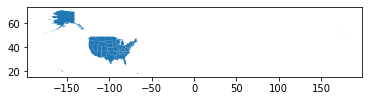

In [3]:
country.plot()

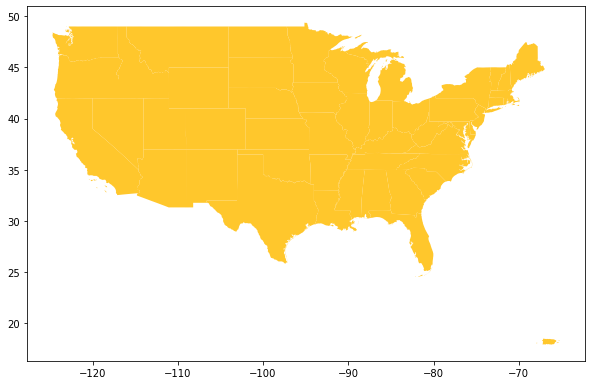

In [36]:
# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(10,10), color='#FFC72C');

In [5]:
#Hurricane Florence data
florence = pd.read_json("C:/Users/Sakshi/Desktop/Projects/FlorenceHurricaneData.json")
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,2018-08-30 11:00:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,2018-08-30 14:00:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,2018-08-30 17:00:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,2018-08-30 20:00:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,2018-08-30 23:00:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [6]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AdvisoryNumber  105 non-null    object        
 1   Date            105 non-null    datetime64[ns]
 2   Lat             105 non-null    float64       
 3   Long            105 non-null    float64       
 4   Wind            105 non-null    int64         
 5   Pres            105 non-null    int64         
 6   Movement        105 non-null    object        
 7   Type            105 non-null    object        
 8   Name            105 non-null    object        
 9   Received        105 non-null    object        
 10  Forecaster      105 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 9.1+ KB


In [7]:
# Statistics of dataset
florence.describe()

,Date,Lat,Long,Wind,Pres
count,105,105.000000,105.000000,105.000000,105.000000
mean,2018-09-09 05:10:17.142857216,25.931429,56.938095,74.428571,981.571429
min,2018-08-30 11:00:00,12.900000,18.400000,25.000000,939.000000
25%,2018-09-03 23:00:00,18.900000,41.000000,40.000000,956.000000
50%,2018-09-10 11:00:00,25.100000,60.000000,70.000000,989.000000
75%,2018-09-14 02:00:00,33.600000,76.400000,105.000000,1002.000000
max,2018-09-18 11:00:00,42.600000,82.900000,140.000000,1008.000000
std,NaN,7.975917,20.878865,36.560765,22.780667


In [8]:
# dropping unnecessary data columns:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,2018-08-30 11:00:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,2018-08-30 14:00:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,2018-08-30 17:00:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,2018-08-30 20:00:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,2018-08-30 23:00:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [9]:
# Changing the long values to make them negative:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,2018-08-30 11:00:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,2018-08-30 14:00:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,2018-08-30 17:00:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,2018-08-30 20:00:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,2018-08-30 23:00:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [10]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,2018-08-30 11:00:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,2018-08-30 14:00:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,2018-08-30 17:00:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,2018-08-30 20:00:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,2018-08-30 23:00:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [11]:
# Change the coordinates to geoPoints
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,2018-08-30 11:00:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,2018-08-30 14:00:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,2018-08-30 17:00:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,2018-08-30 20:00:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,2018-08-30 23:00:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [12]:
# Convert the count df to geodf
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,2018-08-30 11:00:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,2018-08-30 14:00:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,2018-08-30 17:00:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,2018-08-30 20:00:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,2018-08-30 23:00:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [13]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,2018-08-30 11:00:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,2018-08-30 14:00:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,2018-08-30 17:00:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,2018-08-30 20:00:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,2018-08-30 23:00:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)
5,2018-08-31 02:00:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.20000 13.40000)
6,2018-08-31 05:00:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.40000 13.60000)
7,2018-08-31 08:00:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.80000 13.70000)
8,2018-08-31 11:00:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.70000 13.70000)
9,2018-08-31 14:00:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.30000 13.80000)


In [14]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

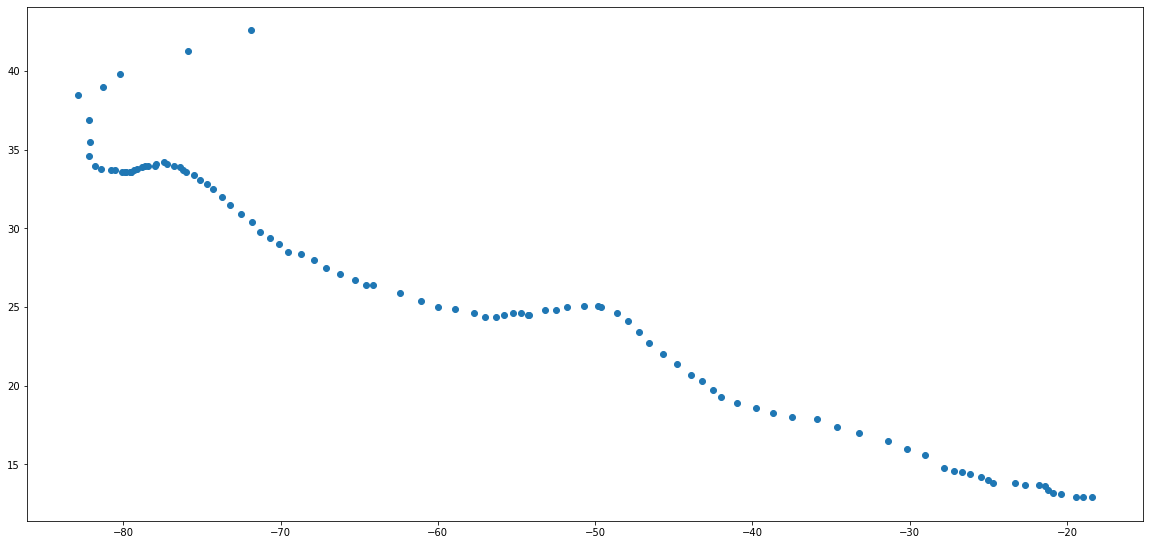

In [15]:
florence.plot(figsize=(20,10));

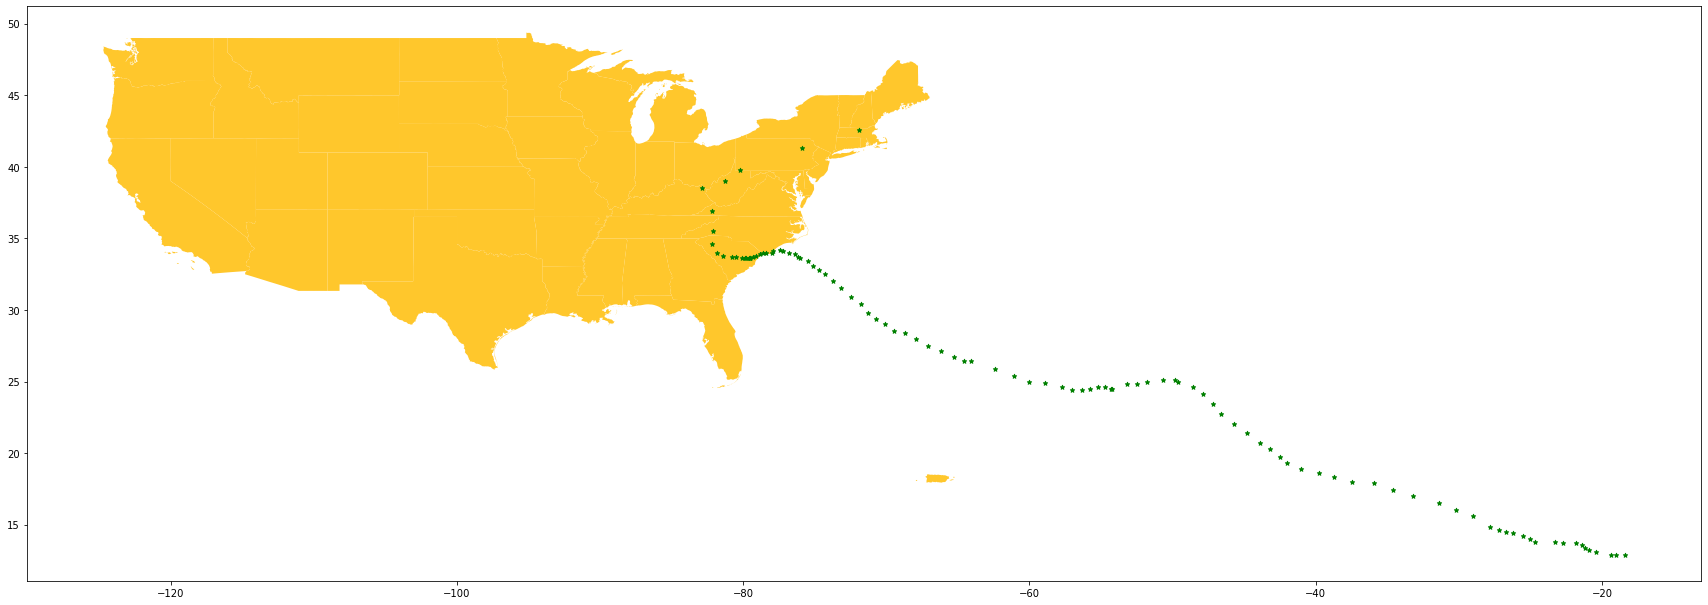

In [37]:
 # Plotting the hurricane on the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#FFC72C')

# plotting the hurricane on top of base(US map) with green color:
florence.plot(ax=base, color='green', marker="*", markersize=20);

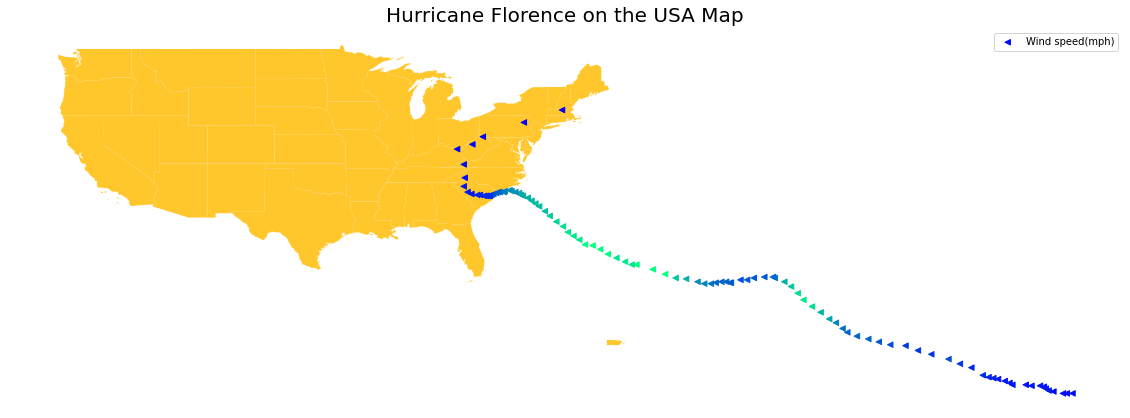

In [52]:
 fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#FFC72C')
map = florence.plot(ax=base, column='Wind', marker="<", markersize=30, cmap='winter', label='Wind speed(mph)')
_ = ax.axis('off')
map.legend()
ax.set_title("Hurricane Florence on the USA Map", fontsize=20)
plt.savefig('Hurricane_Florence.png',bbox_inches='tight');